## Exploratory Analysis

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

There are 4 csv files in the current version of the dataset:

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/eeg-data-from-hands-movement/Dataset/User_D/dataset.csv
/kaggle/input/eeg-data-from-hands-movement/Dataset/User_C/dataset.csv
/kaggle/input/eeg-data-from-hands-movement/Dataset/User_A/dataset.csv
/kaggle/input/eeg-data-from-hands-movement/Dataset/User_B/dataset.csv


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

### USER C

In [6]:
df1 = pd.read_csv('/kaggle/input/eeg-data-from-hands-movement/Dataset/User_C/dataset.csv', delimiter=',')
df1.dataframeName = 'dataset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 1024 columns


In [7]:
df1.head(5)

Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3573.336166  2067.827798  1.334973  2.294574  0.742210  2.052755   
1    1.0  3569.424197  2063.871329  1.639684  2.573080  1.097168  2.678287   
2    1.0  3570.767652  2064.654687  0.706498  2.613442  1.086770  2.222977   
3    1.0  3569.156909  2065.357831  0.940101  2.563546  0.836405  2.151778   
4    1.0  3567.536119  2063.997440  0.961830  2.374021  1.046514  1.783034   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  3.604952  4.854279  3575.508401  ...     NaN     NaN     NaN      NaN   
1  2.313650  4.727548  3573.524571  ...     NaN     NaN     NaN      NaN   
2  2.409857  4.936480  3573.935350  ...     NaN     NaN     NaN      NaN   
3  2.650254  4.500677  3572.802320  ...     NaN     NaN     NaN      NaN   
4  2.432391  4.626892  3571.437750  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 1024 columns]

Distribution graphs (histogram/bar graph) of sampled columns:

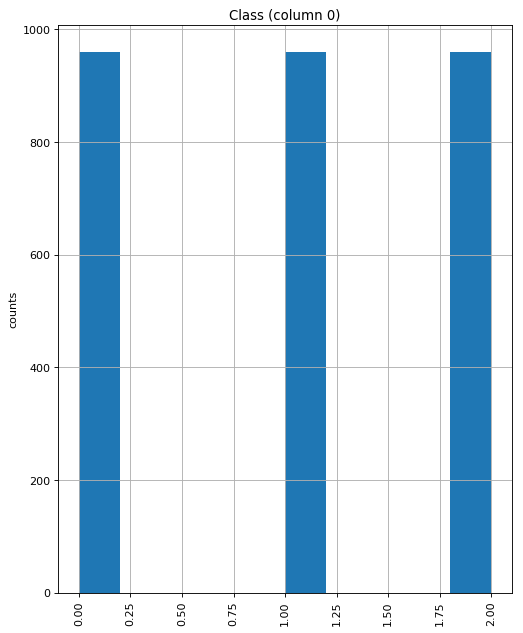

In [8]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

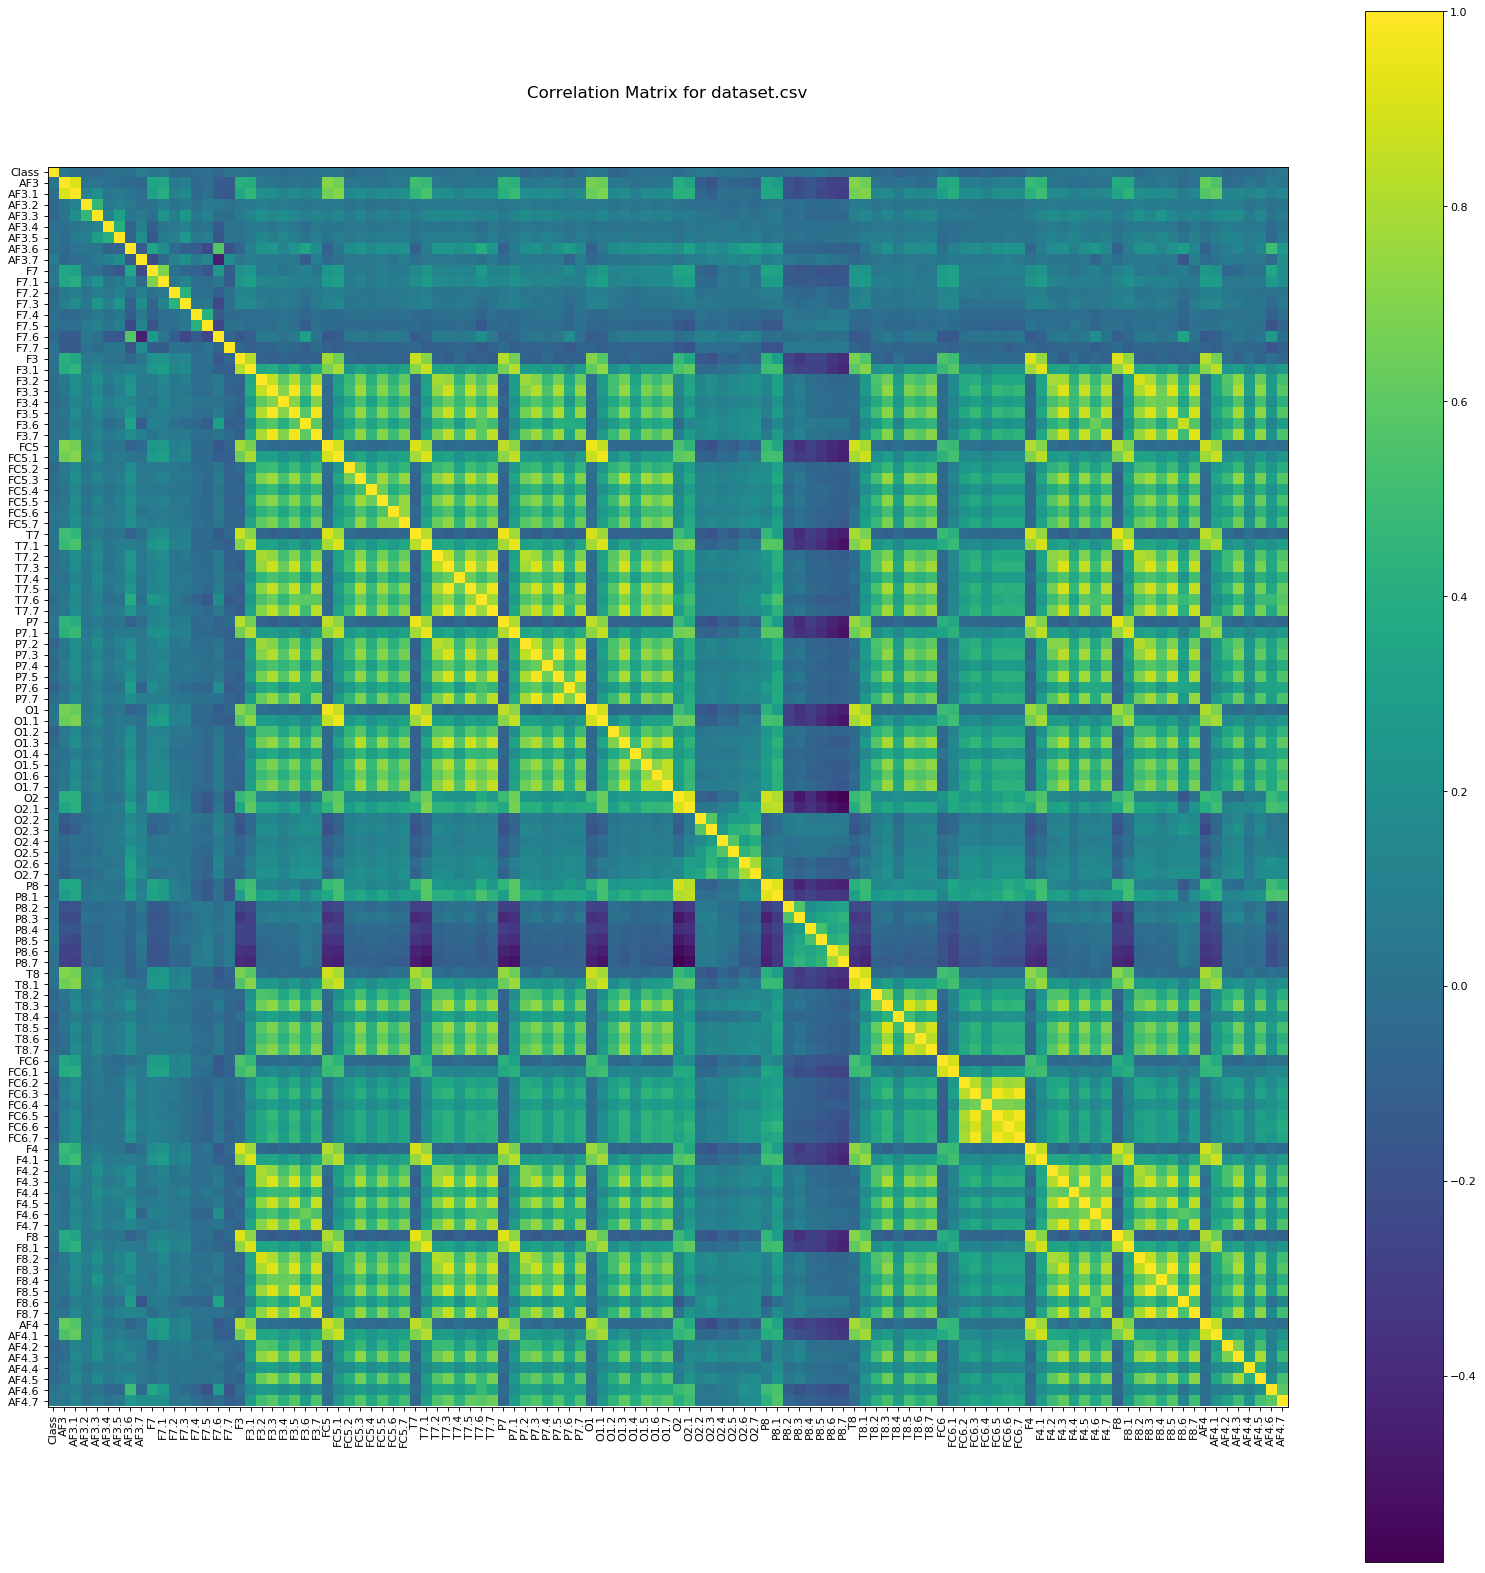

In [9]:
plotCorrelationMatrix(df1, 25)

Scatter and density plots:

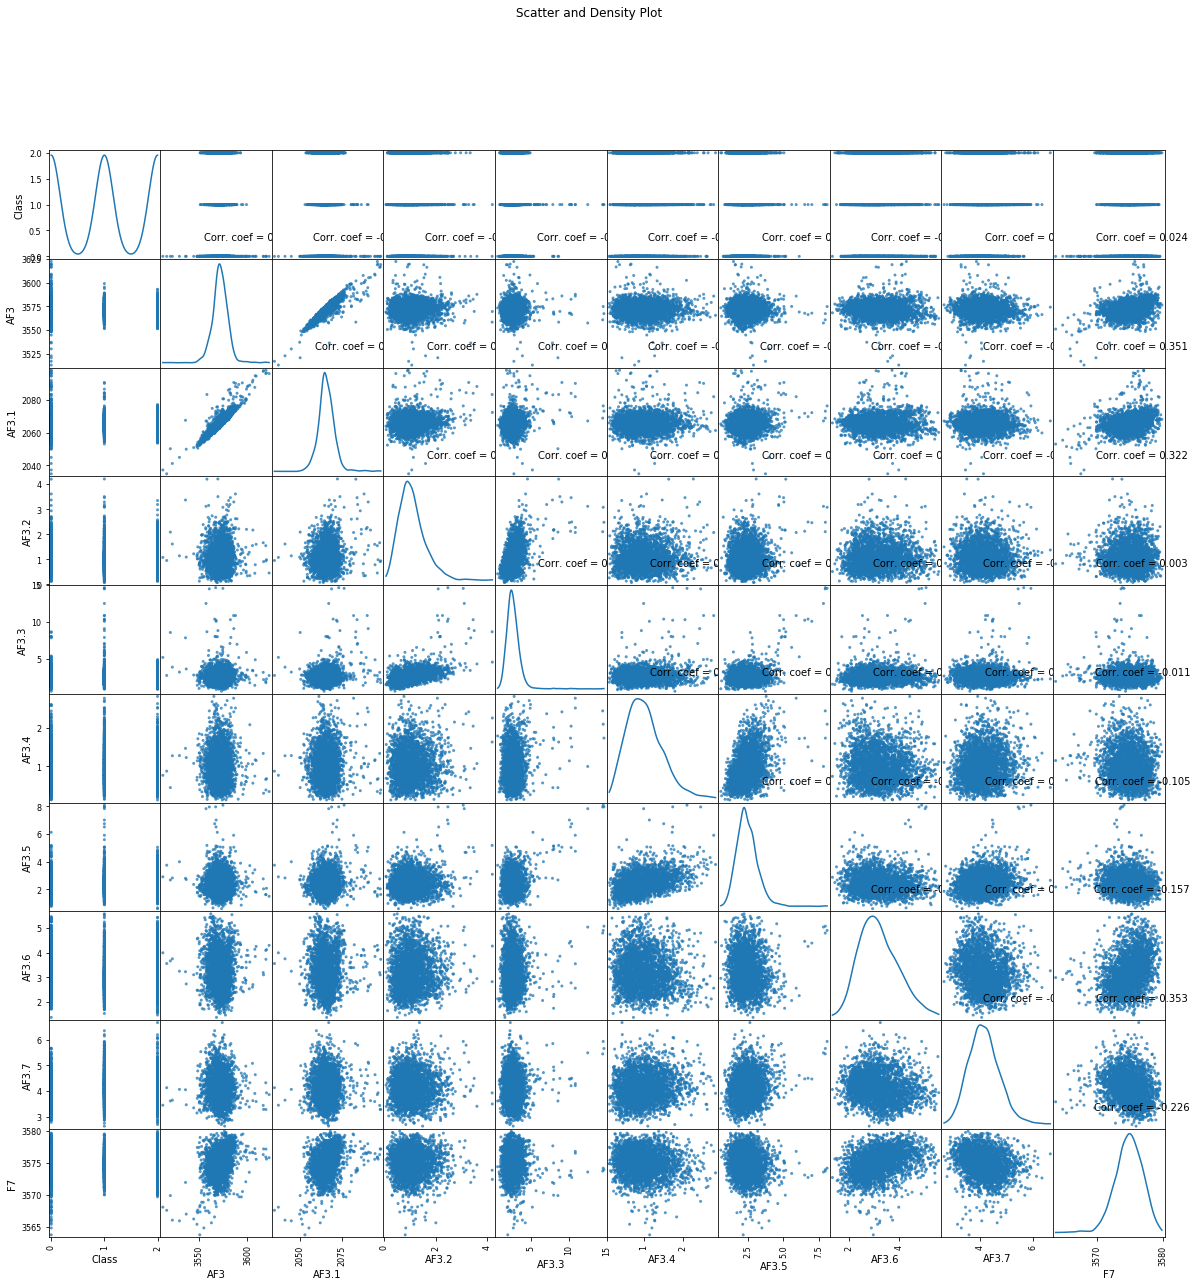

In [10]:
plotScatterMatrix(df1, 20, 10)

### User B

In [11]:
df2 = pd.read_csv('/kaggle/input/eeg-data-from-hands-movement/Dataset/User_B/dataset.csv', delimiter=',')
df2.dataframeName = 'dataset.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 1024 columns


In [12]:
df2.head(5)

Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    2.0  3577.872723  2067.408557  1.025738  1.744496  0.883469  1.282893   
1    2.0  3577.830179  2066.857321  0.573598  1.711991  1.012575  1.900513   
2    2.0  3576.706494  2066.736837  0.525896  1.584096  0.201467  1.038686   
3    2.0  3577.453273  2066.839712  0.549982  1.322669  0.373559  1.043046   
4    2.0  3577.145874  2066.495108  0.253211  1.169839  0.256740  1.169276   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  3.039058  2.730998  3568.553050  ...     NaN     NaN     NaN      NaN   
1  2.746218  3.066821  3569.060181  ...     NaN     NaN     NaN      NaN   
2  2.685631  2.977552  3569.214969  ...     NaN     NaN     NaN      NaN   
3  2.547650  2.906844  3568.109499  ...     NaN     NaN     NaN      NaN   
4  2.680609  2.864313  3568.736123  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 1024 columns]

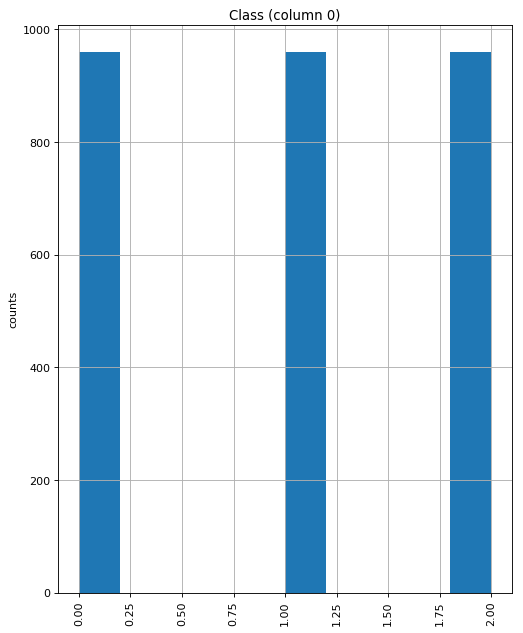

In [13]:
plotPerColumnDistribution(df2, 10, 5)

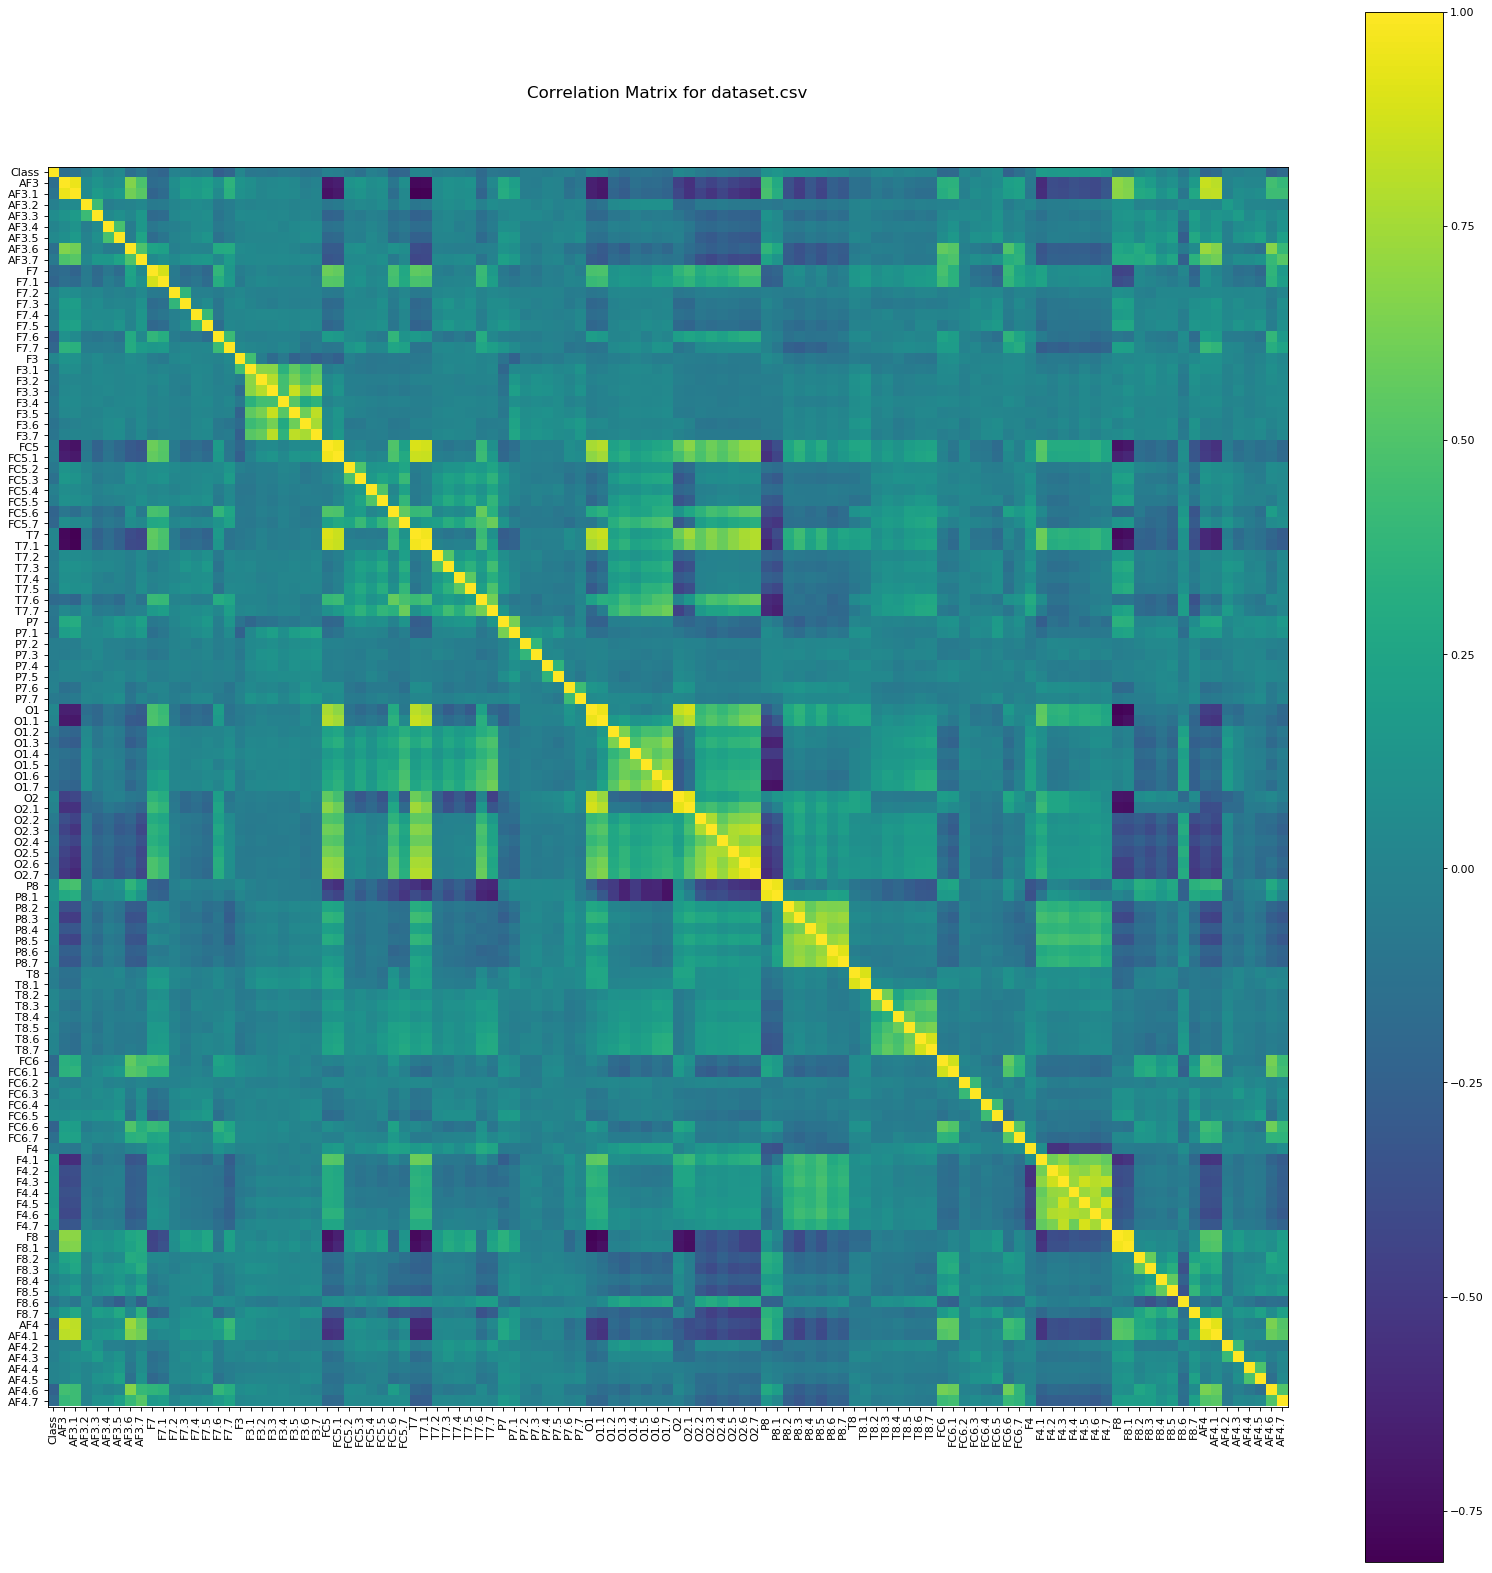

In [14]:
plotCorrelationMatrix(df2, 25)

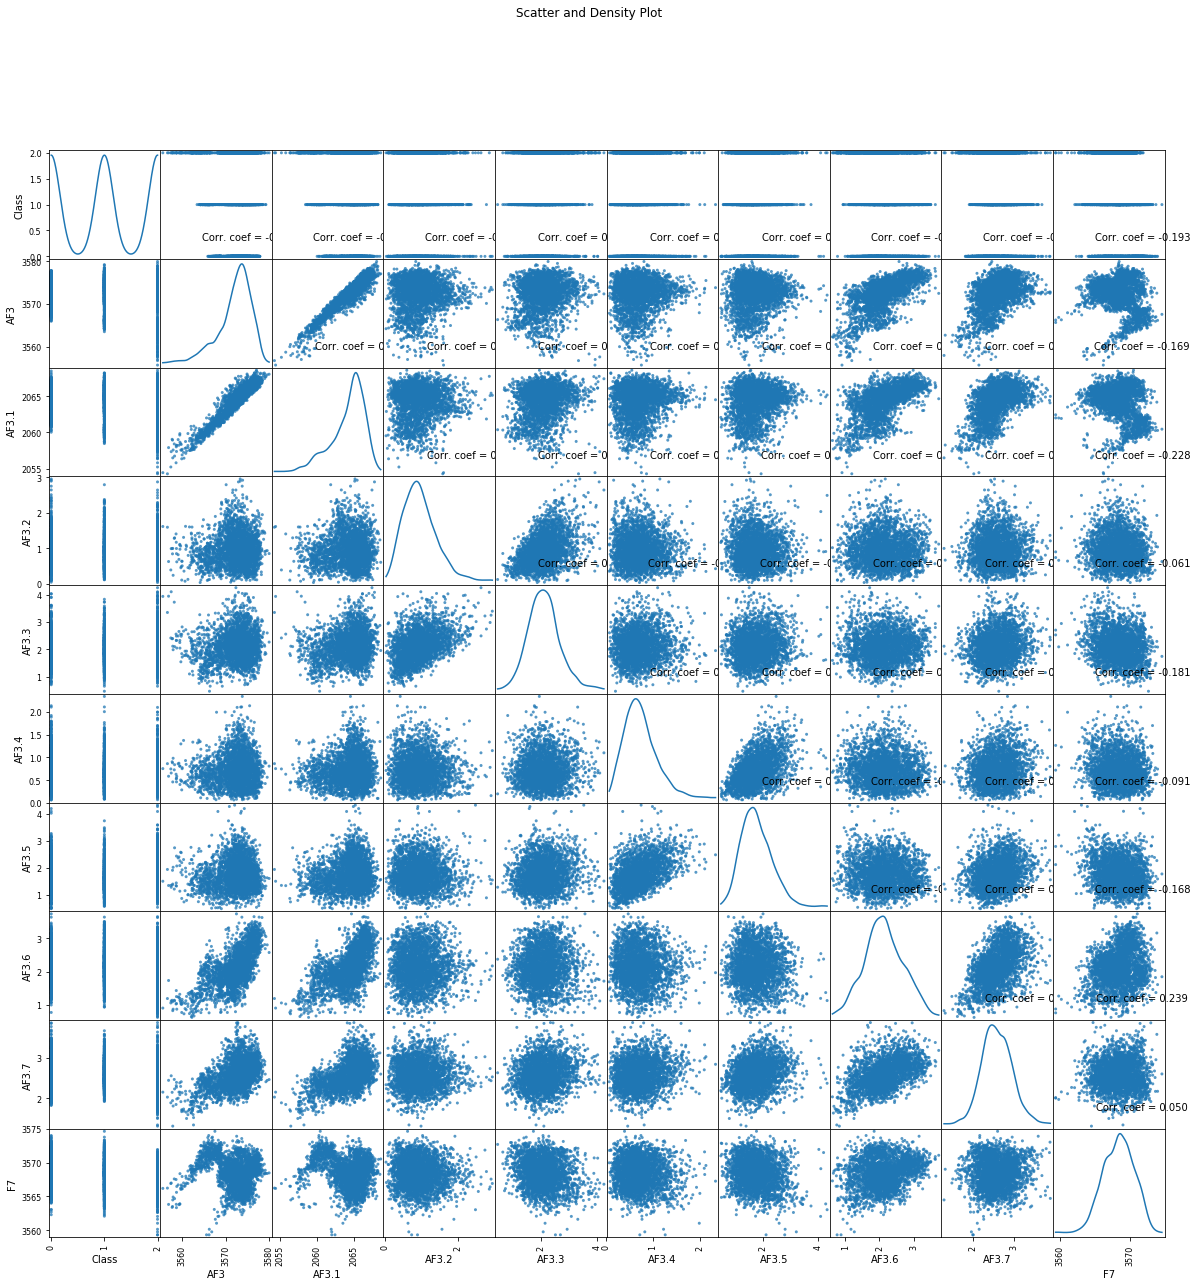

In [15]:
plotScatterMatrix(df2, 20, 10)

### User D

In [16]:
df3 = pd.read_csv('/kaggle/input/eeg-data-from-hands-movement/Dataset/User_D/dataset.csv', delimiter=',')
df3.dataframeName = 'dataset.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 1024 columns


In [17]:
df3.head(5)

Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3566.375438  2062.665095  1.040973  2.574824  1.376404  1.657806   
1    1.0  3565.986713  2061.826341  1.347088  2.154989  0.904145  2.603965   
2    1.0  3566.977885  2062.639807  1.083747  2.186981  1.155864  2.293261   
3    1.0  3566.342634  2063.069909  1.208843  2.160716  1.143995  2.283394   
4    1.0  3567.798629  2062.549327  1.378424  3.255706  0.795261  1.726990   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  0.933377  2.429998  3564.653552  ...     NaN     NaN     NaN      NaN   
1  1.175508  2.292886  3564.071577  ...     NaN     NaN     NaN      NaN   
2  1.144330  2.107225  3564.207493  ...     NaN     NaN     NaN      NaN   
3  1.008707  2.047132  3564.536023  ...     NaN     NaN     NaN      NaN   
4  0.914162  1.746653  3565.157175  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 1024 columns]

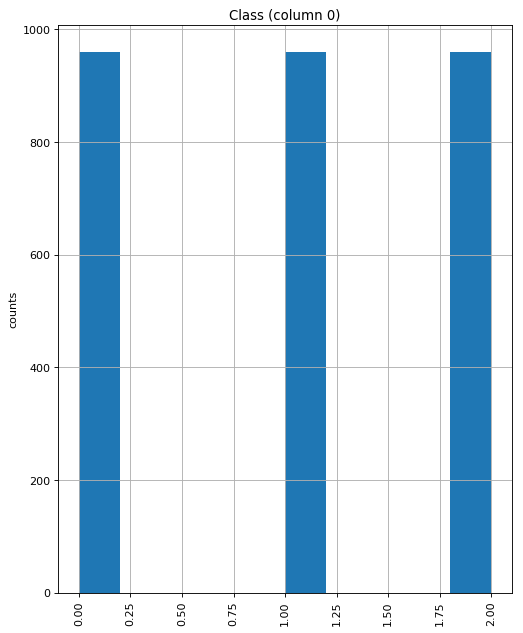

In [18]:
plotPerColumnDistribution(df3, 10, 5)

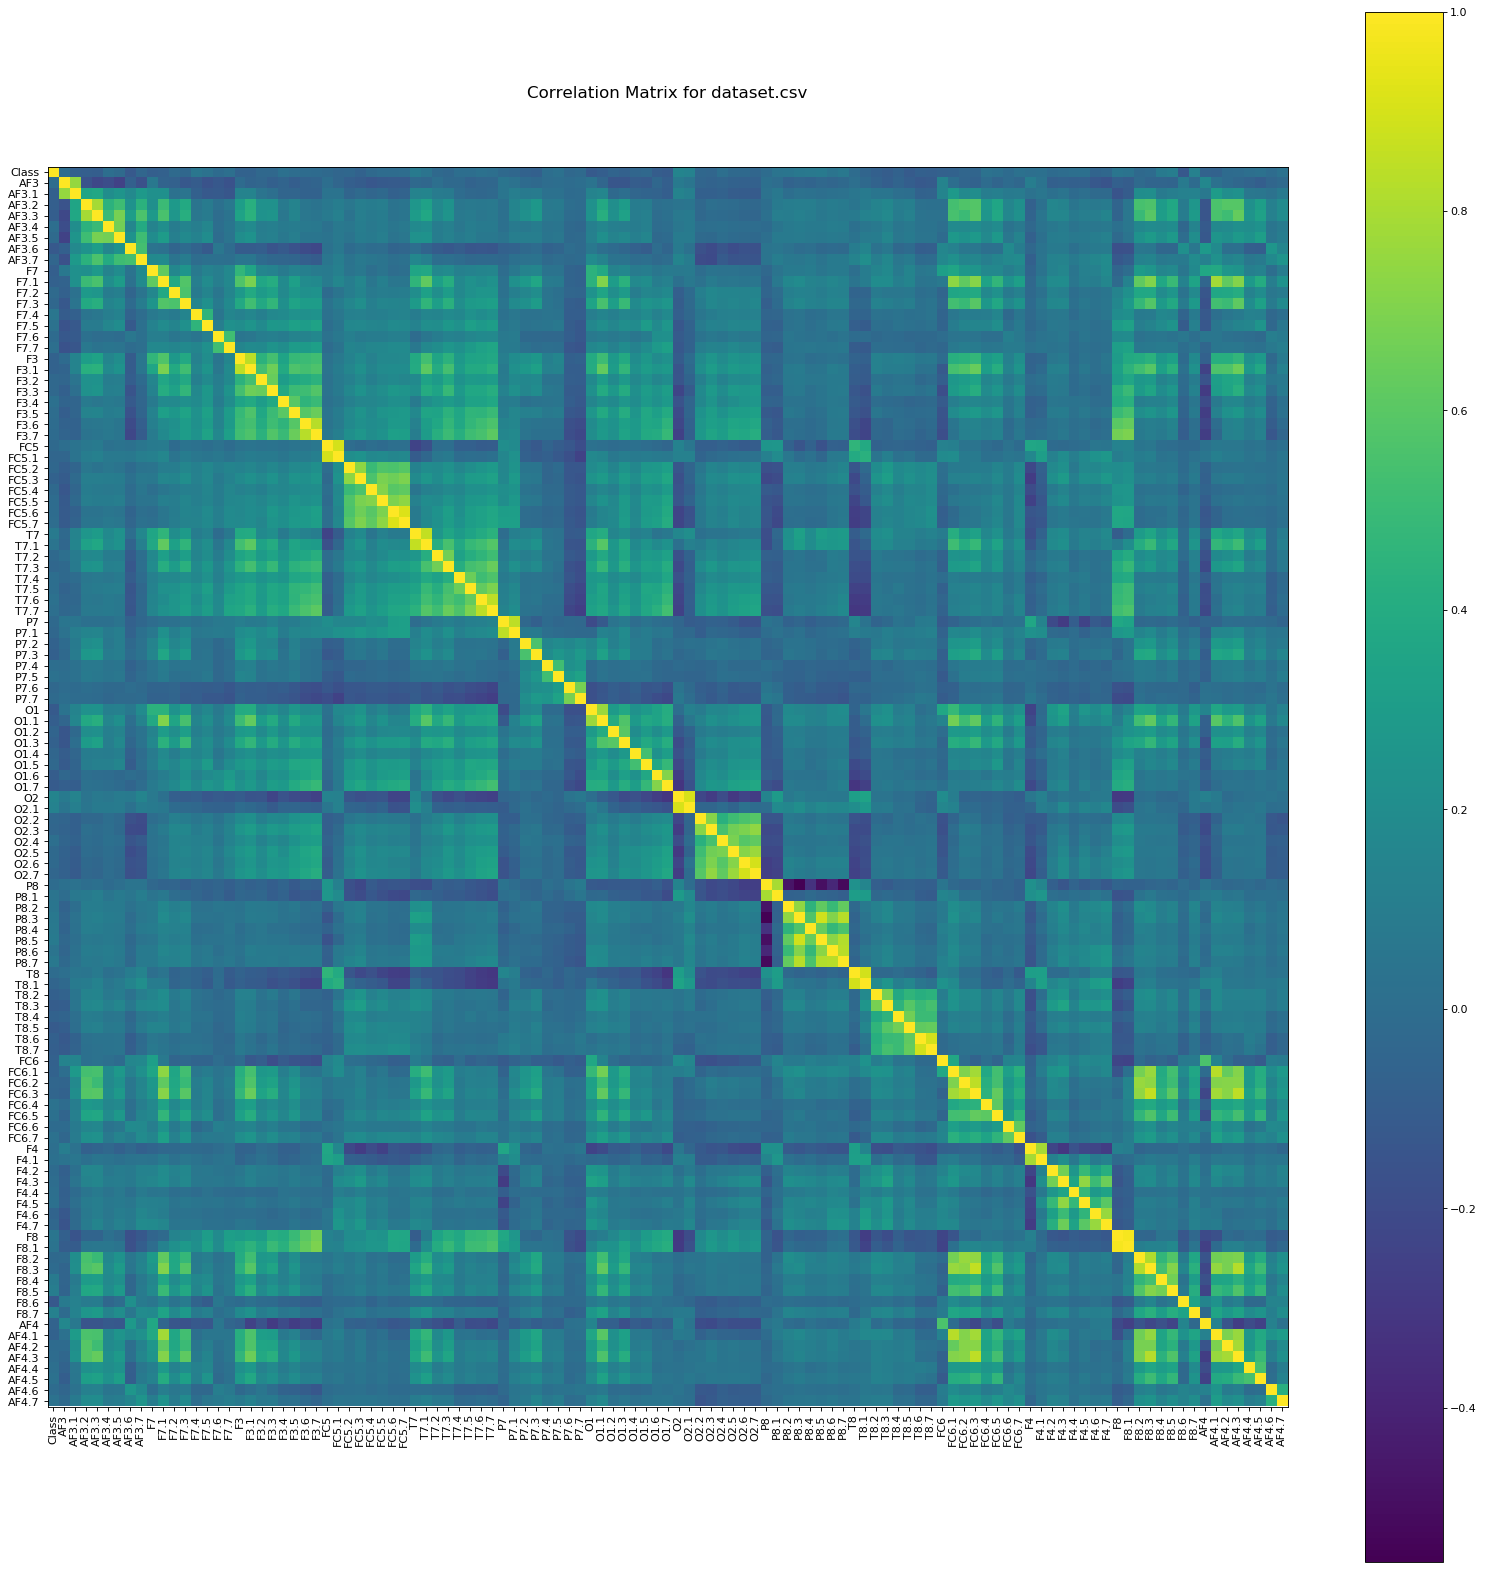

In [19]:
plotCorrelationMatrix(df3, 25)

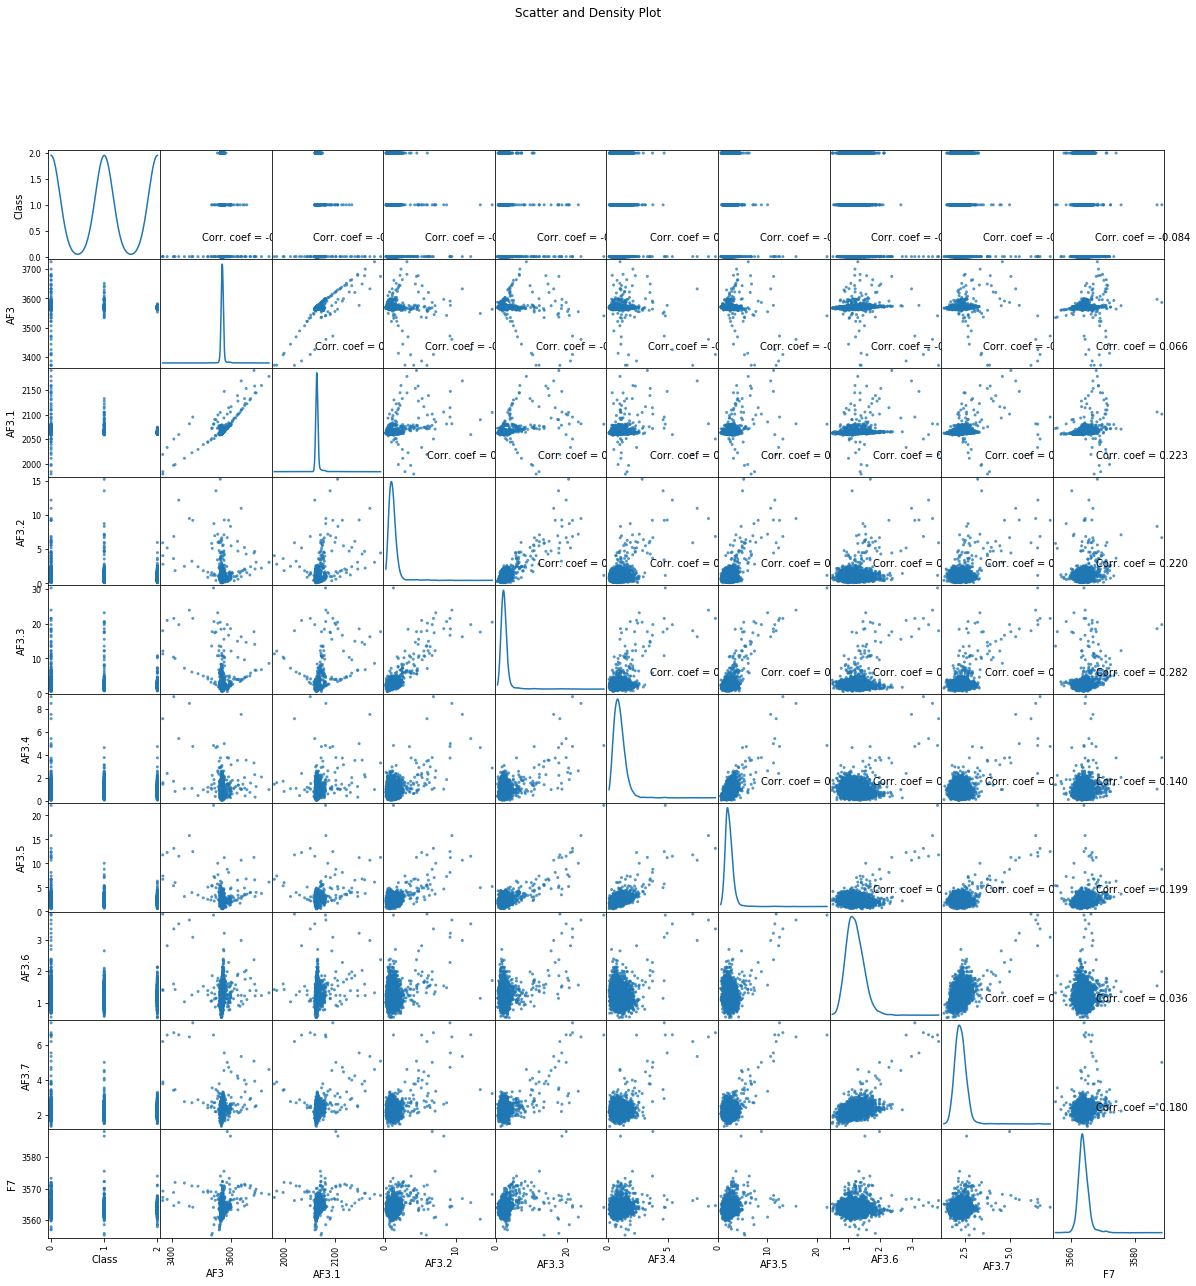

In [20]:
plotScatterMatrix(df3, 20, 10)

### User A

In [21]:
df3 = pd.read_csv('/kaggle/input/eeg-data-from-hands-movement/Dataset/User_A/dataset.csv', delimiter=',')
df3.dataframeName = 'dataset.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2880 rows and 113 columns


In [22]:
df3.head(5)

Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3569.164550  2063.892754  1.673726  4.444736  0.526209  3.002088   
1    1.0  3568.423670  2063.099248  1.897790  3.728823  1.304186  1.854353   
2    1.0  3568.157929  2062.445859  2.798014  2.574504  1.120537  1.958819   
3    1.0  3567.710021  2062.112673  2.181775  3.610507  0.629608  2.155876   
4    1.0  3565.546124  2063.128867  1.685161  3.384311  0.677526  1.795798   

      AF3.6     AF3.7           F7  ...       F8.6       F8.7          AF4  \
0  1.425022  3.302739  3563.803888  ...  45.468326  72.508750  3701.186330   
1  1.366575  2.546458  3563.560922  ...  36.551948  66.931186  3725.210509   
2  0.982433  2.258622  3563.279981  ...  40.754308  66.816547  3724.417296   
3  0.856275  2.233711  3562.787801  ...  38.074628  63.915386  3725.822160   
4  0.927924  1.909810  3562.655091  ...  35.357384  64.534645  3723.053978   

         AF4.1      AF4.2      AF4.3      AF4.4      AF4.5      AF4.6  \
0  2182.676835  18.192418  41.349662  16.004756  42.046467  46.280843   
1  2180.197439   8.820788  38.012788  19.601233  29.431054  38.559351   
2  2176.823208  18.159202  23.612639  14.378291  19.555084  43.210004   
3  2177.089059  19.737616  29.484396  15.793034  25.713513  39.250246   
4  2167.798335   8.429414  26.374975  14.920736  35.675266  33.901687   

       AF4.7  
0  73.565719  
1  67.470041  
2  67.781924  
3  65.031031  
4  66.956313  

[5 rows x 113 columns]

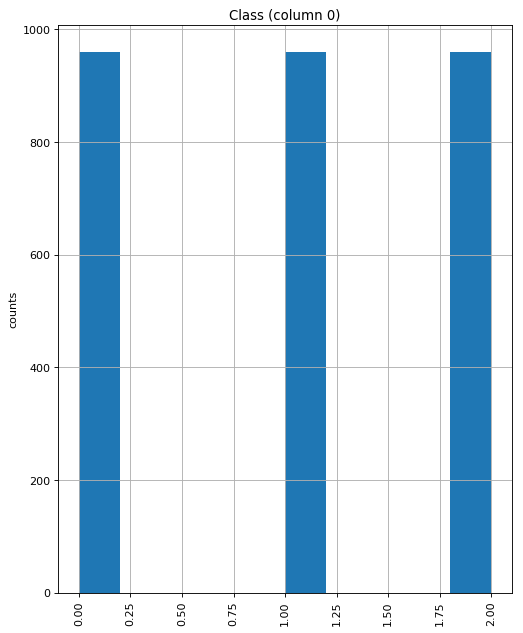

In [23]:
plotPerColumnDistribution(df3, 10, 5)

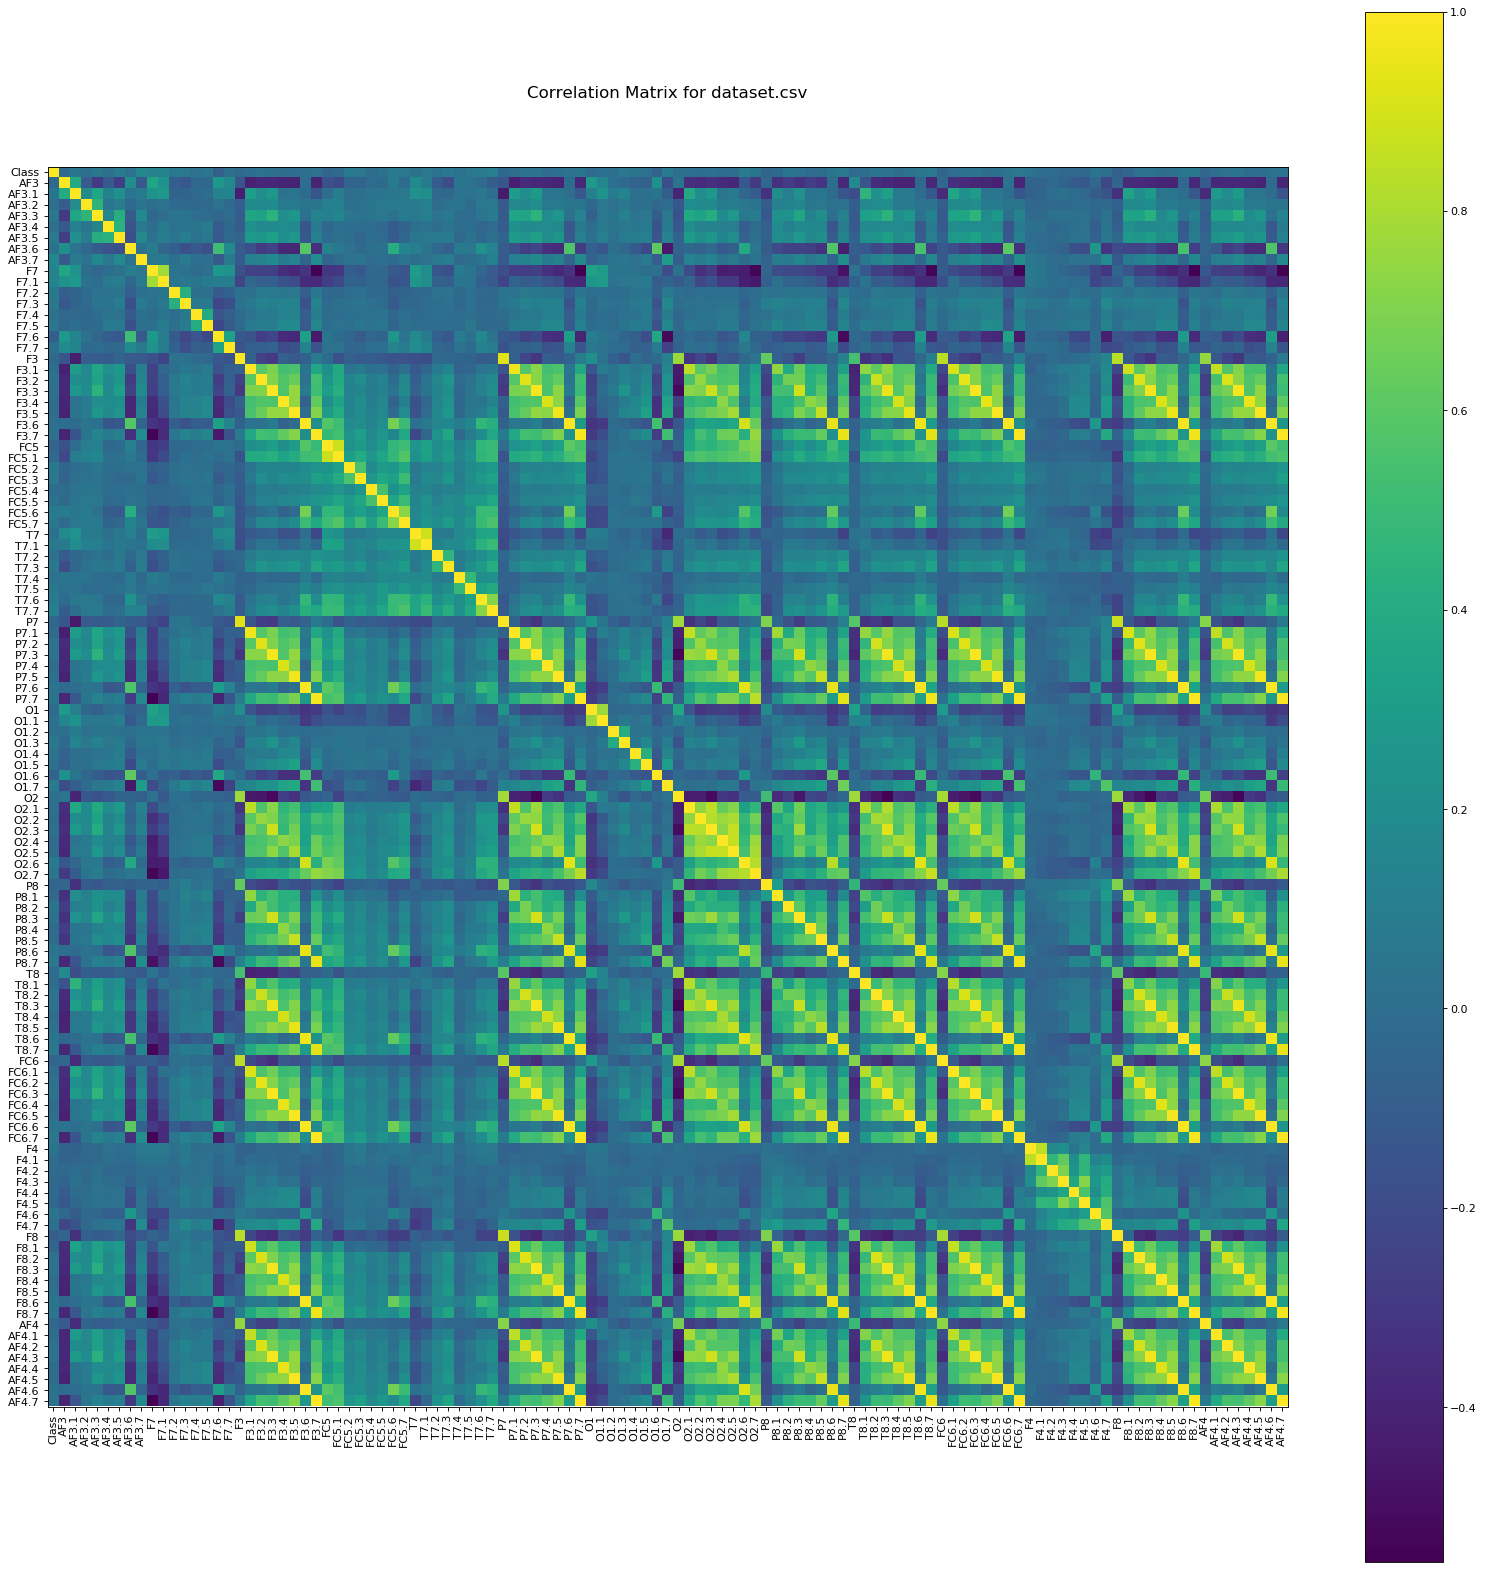

In [24]:
plotCorrelationMatrix(df3, 25)

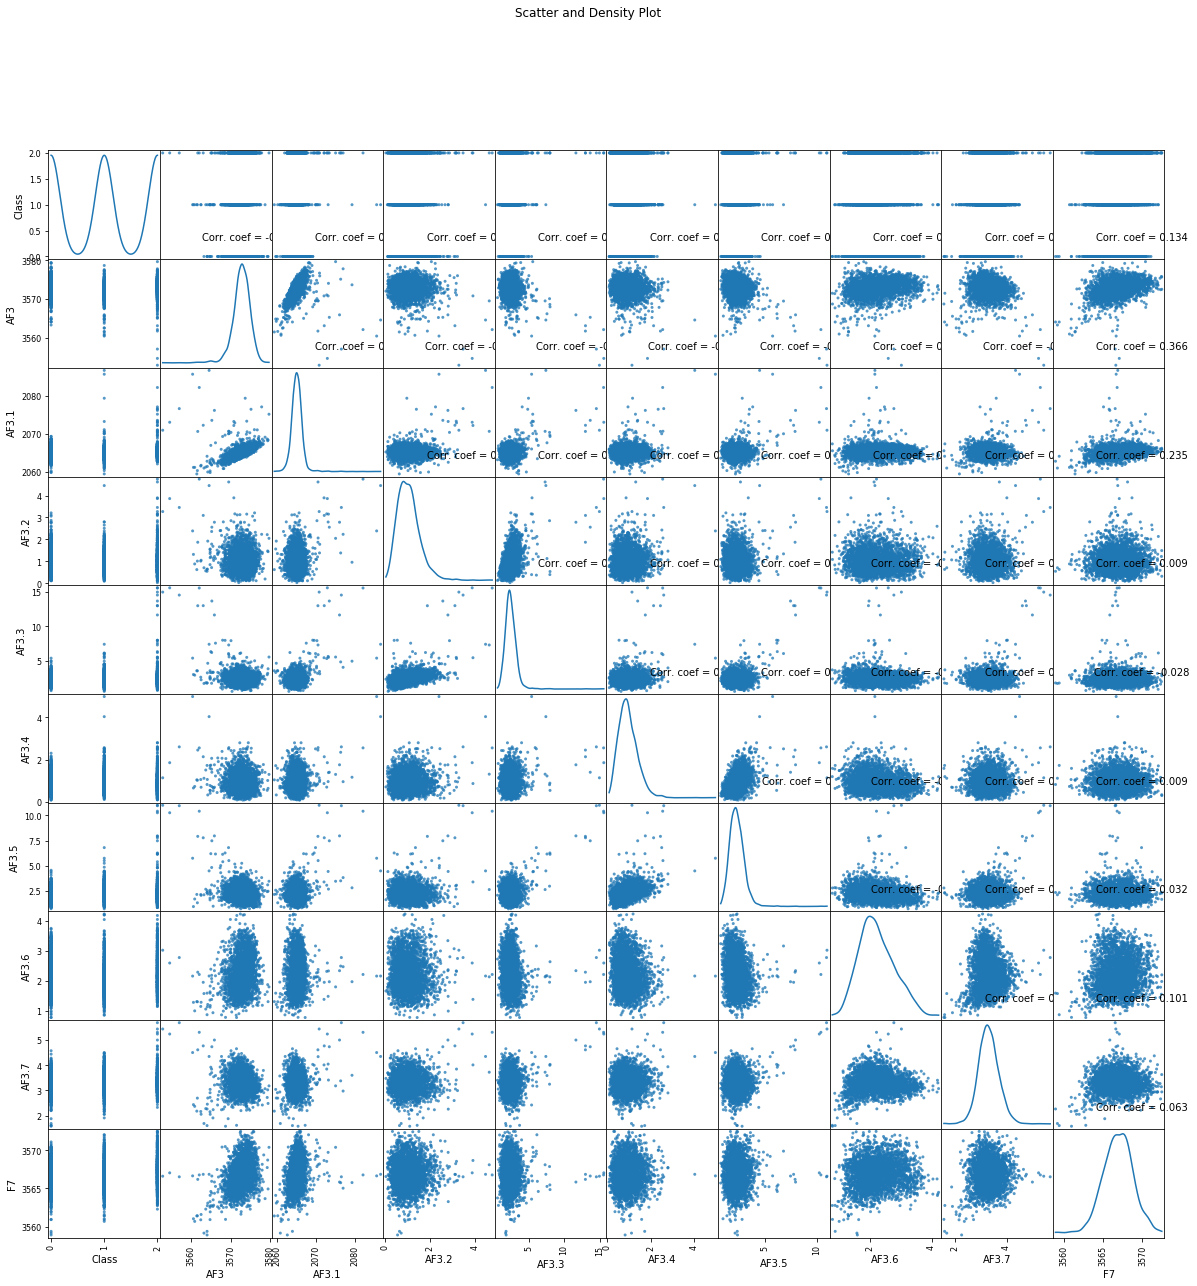

In [25]:
plotScatterMatrix(df3, 20, 10)

## Conclusion
This concludes your starter analysis!